## HD 2039

Radial velocity data for HD2039 were obtained from Tinney et al.(2003).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [8]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = 100.0 / numpy.square( er )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [9]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with with unknown scale
   16945   -130.9     16.9   -109.0      7  [    5.894    0.736  164.242 1187.358    5.423 ...]          .026  116.578 1092.231    2.464 ...]
Engines              success     reject     failed       best      calls
GalileanEngine         93109      29973      56322         50      16945
Calls to LogL         179404   to dLogL      29973
Samples       17445
Evidence       -56.865 +-      0.080


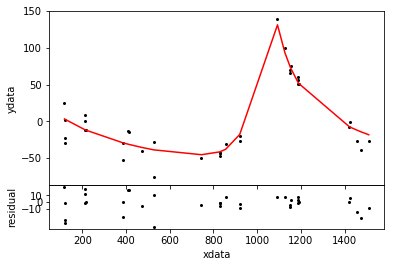

In [10]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


In [14]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180/math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( fmt( pal, max=None ) )
print( fmt( stl, max=None ) )
print( fmt( sl.scale ), fmt( sl.stdevScale ) )
print( evi )

[    3.707    0.691  130.182 1252.030    5.171    5.795]
[    3.246    0.067   27.224   69.326    0.305    0.139]
[    3.707    0.691  130.182 1252.030  296.268  120.061]
[    3.246    0.067   27.224   69.326   17.480    2.882]
   14.179     2.507
-56.86520844547818


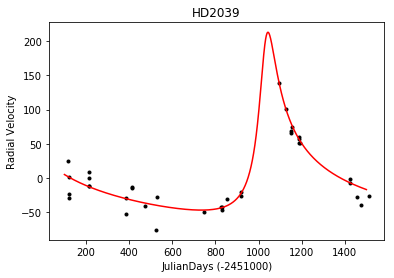

In [15]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()